## Student Performance Indicator


#### Life Cycle of a Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-processing 
- Model Training
- Choose the best model

### 1 Problem Statement

- This Project understand how a student's performance(test score) is affected by other variables Such as Gender, Ethnicity, Parents level of education, Lunch and Test preparatin course.


### 2 Data Collection

- Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data contains 8 columns and 1000 rows

### 2.1 Importing Data & Required Packages

#### numpy, pandas, matplotlib, seaborn & waring libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Importing csv data as pandas dataframe

In [2]:
df=pd.read_csv('data/stud.csv')

#### Show top-5 records 

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of a dataset


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Check to Perform

- check missing values
- check duplicates
- check data-types
- check number of unique values of each columns
- check statistics of dataset
- check various categories present in different categorical column

### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset

### 3.2 Check Duplicates 

In [6]:
df.duplicated().sum()

0

#### There are no duplicates values in the dataset

### 3.3 Check Data-types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check Number of Unique Values in each Columns

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check Statistics of Dataset 

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From the above description of numerical data, all mean are very close to each other - between 66.08 to 68.05
- Standard deviation also are close - between 14.6 to 15.19
- While there is a minimum score of 0 for math, for writing score is much higher = 10 and for reading = 17

### 3.6 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
## let's capture numerical and categorical feature
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [12]:
## Unique categories in categorical features
for feature in categorical_features:
    print("{0}: ".format(feature),end="")
    print(df[feature].unique())

gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']


In [13]:
## print columns
print('We have {0} numerical features: {1}'.format(len(numerical_features),numerical_features))
print('\nWe have {0} categorical features: {1}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Adding columns for total score and Average

In [14]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3

df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### Students with full marks in each paper 

In [15]:
math_full=df[df['math_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
reading_full=df[df['reading_score']==100]['average'].count()

print("Number of students with full marks in maths: ",math_full)
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in reading: {reading_full}")

Number of students with full marks in maths:  7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


#### Students with marks less than 20 in each subjects

In [16]:
math_less_20=df[df['math_score']<20]['average'].count()
writing_less_20=df[df['writing_score']<20]['average'].count()
reading_less_20=df[df['reading_score']<20]['average'].count()

print(f"Number of students with marks less than 20 in maths: {math_less_20}")
print(f"Number of students with marks less than 20 in writing: {writing_less_20}")
print(f"Number of students with marks less than 20 in reading: {reading_less_20}")

Number of students with marks less than 20 in maths: 4
Number of students with marks less than 20 in writing: 3
Number of students with marks less than 20 in reading: 1


#### Insight

- From above values, we get students performed worst in Maths
- Best performance are in reading

### 4. Exploratory Data Analysis (Visualization)

### 4.1 Visualize average score distributin to make some conclusion

- Histogram
- Kernel distribution function(kde)

#### Histogram & kde

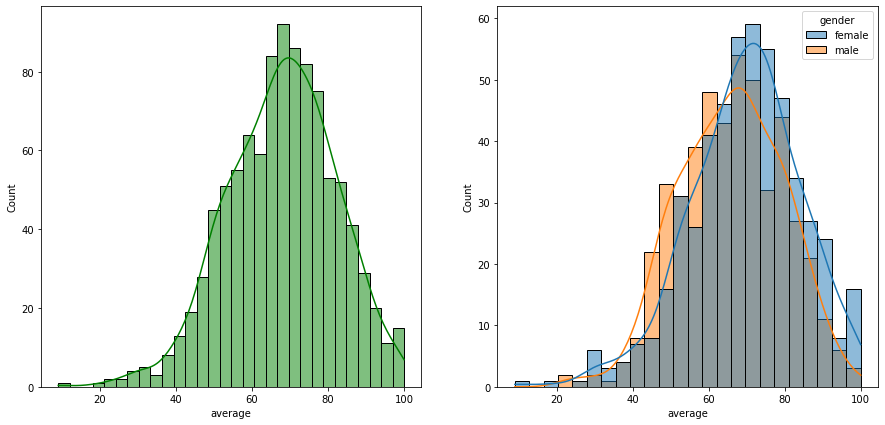

In [17]:
## gender
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

#### Insight
- Female student tends to perform well than male student

####  Lunch

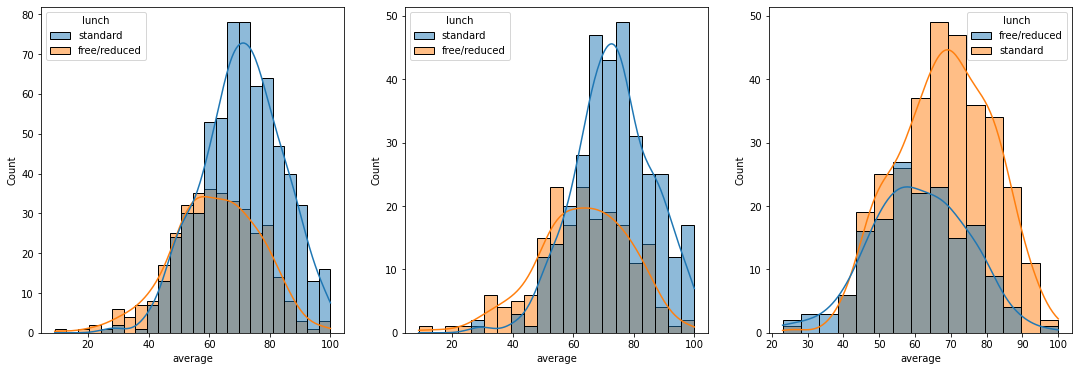

In [18]:
## lunch

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insight
- Standard lunch help performs well in exam
- Be it male or female

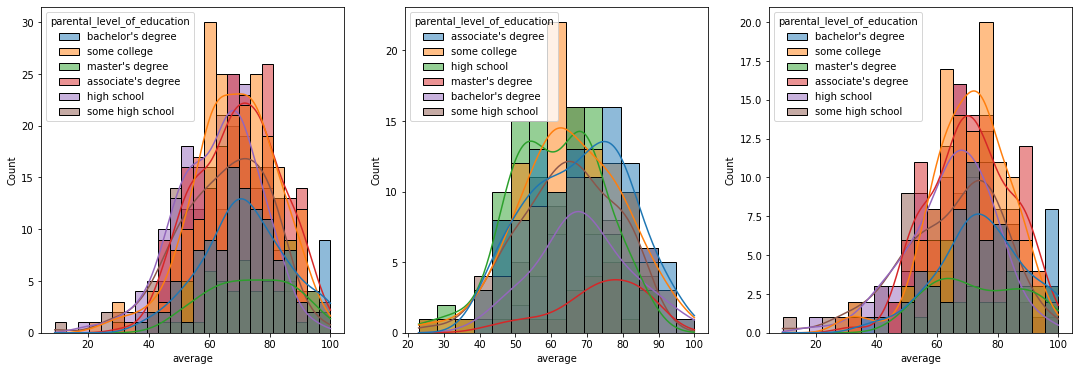

In [19]:
## Parental level of education

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insight

- In general Parent's education do not help student perform well in exam

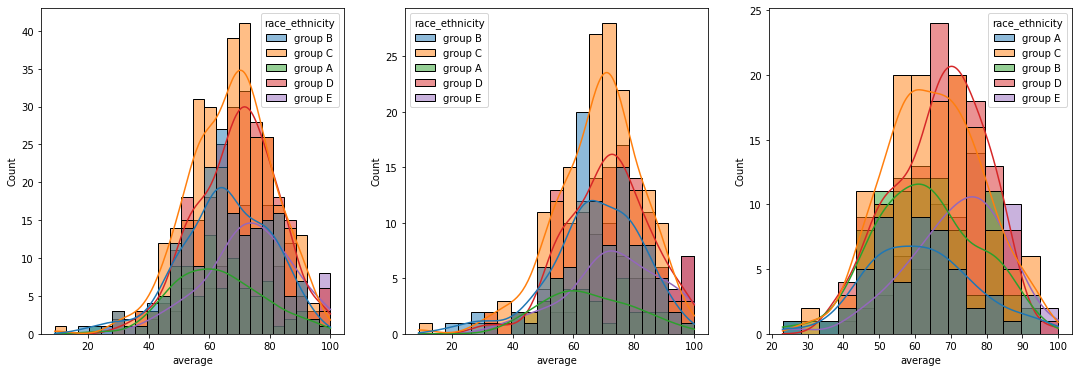

In [20]:
## race ethnicity

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximumum score of students in all three subjects

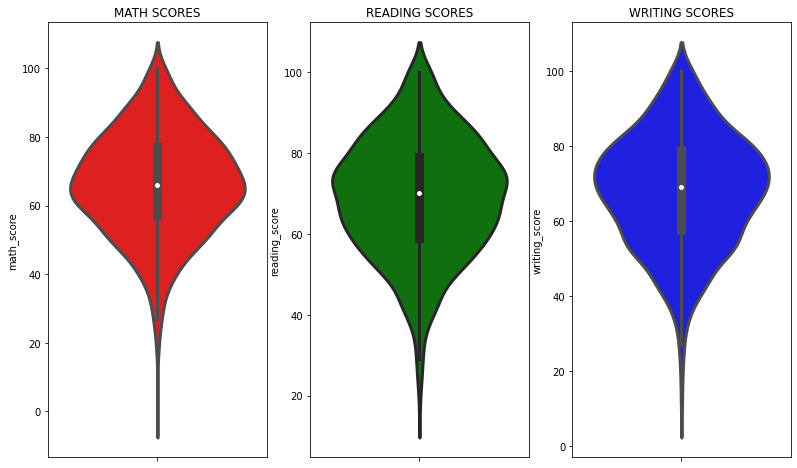

In [21]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate Analysis Using Pieplot

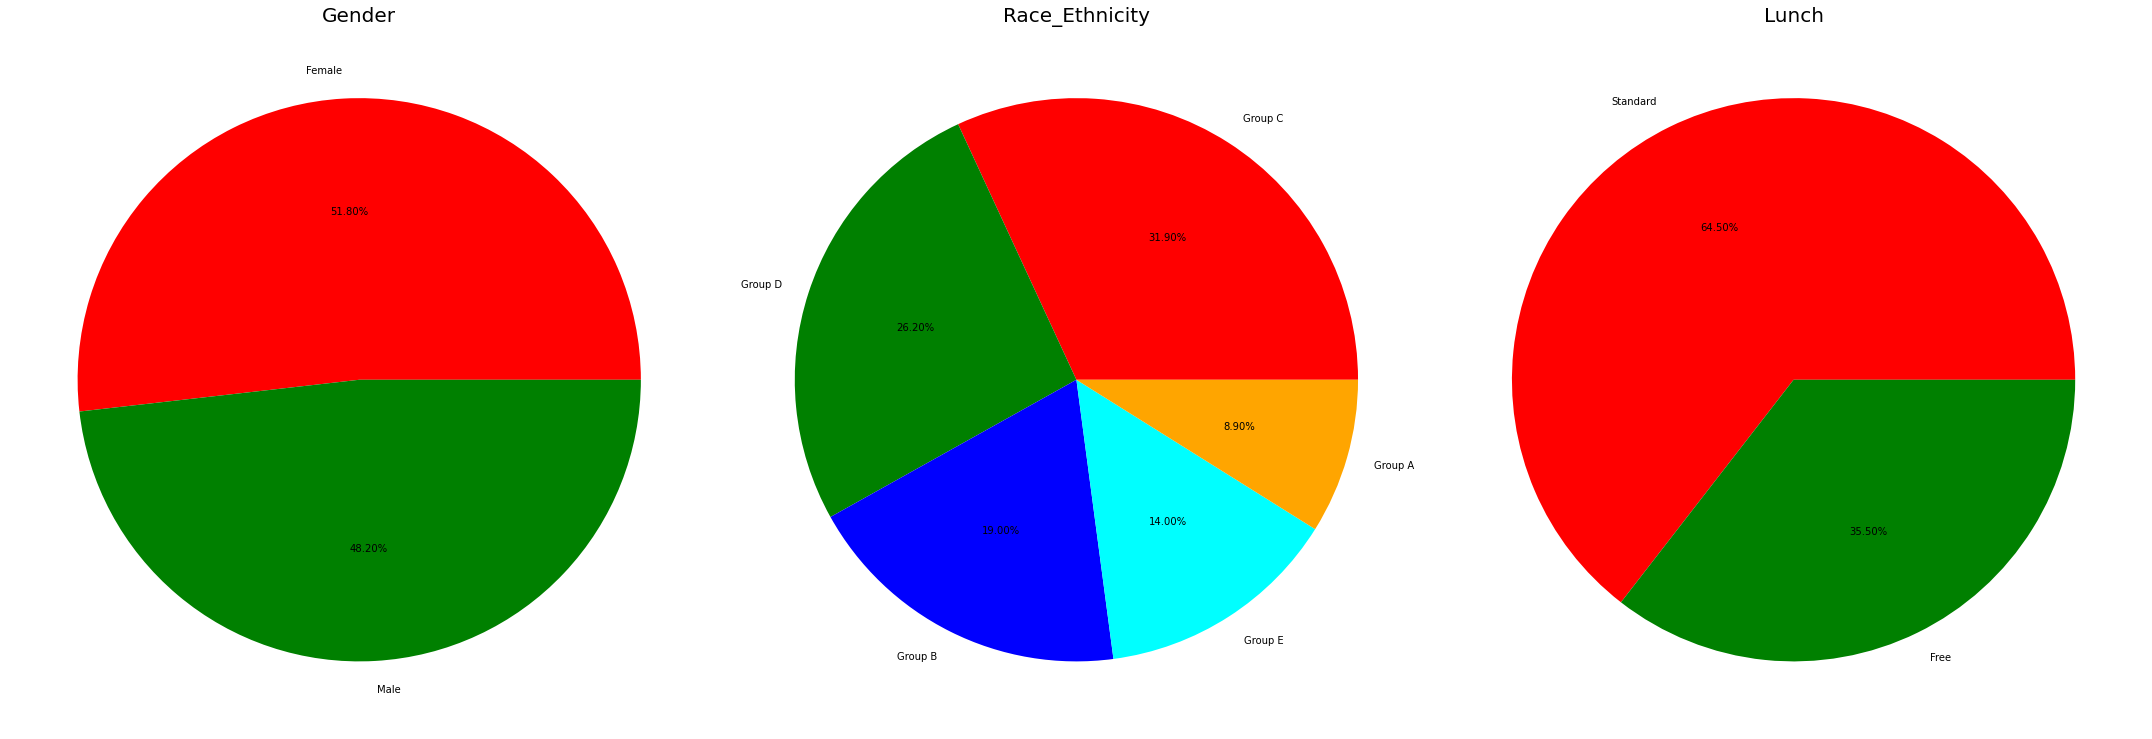

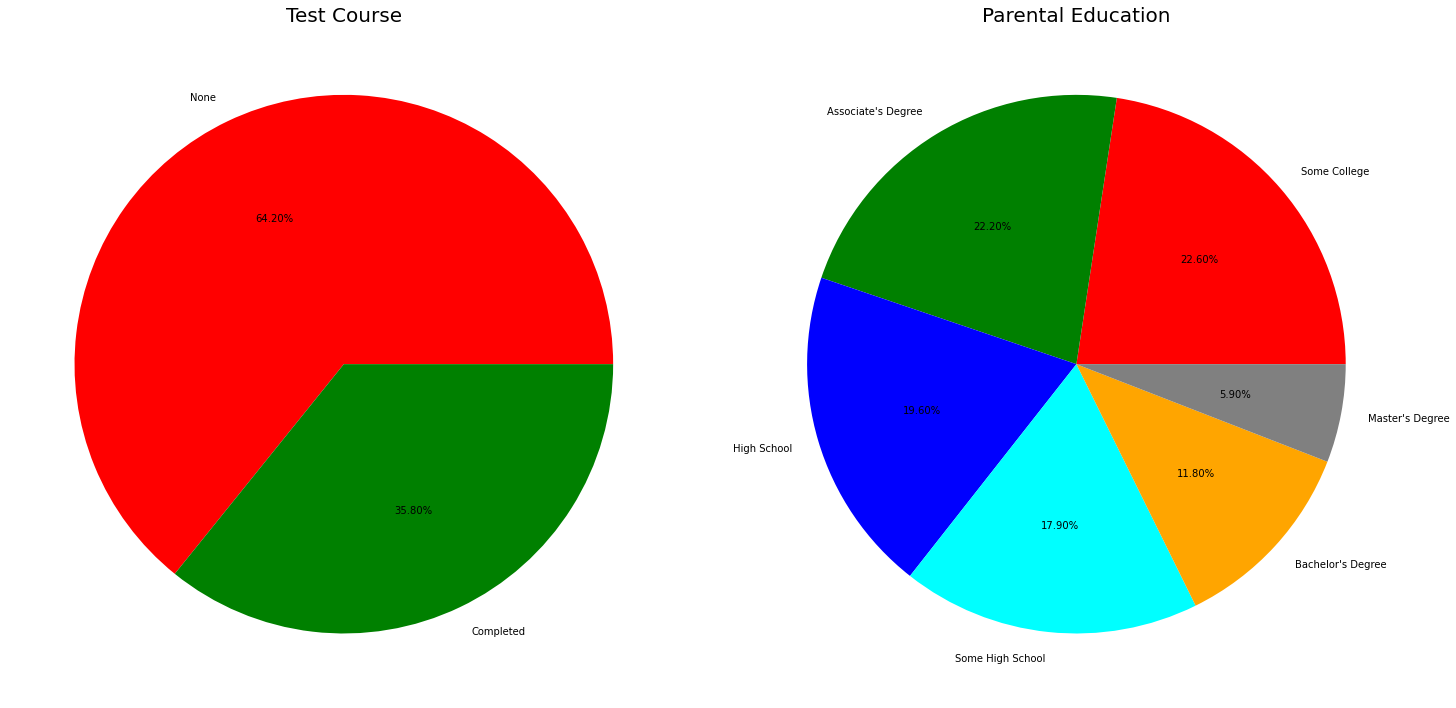

In [22]:
plt.rcParams['figure.figsize'] = (30, 22)

plt.subplot(1, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()



plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 3, 1)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 3, 2)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature wise Visualization 

### 4.4.1 Gender Column

- How is distribution of gender?
- Is gender has any impact on student's performance?

#### Univariate Analysis ( How is distribution of gender? )

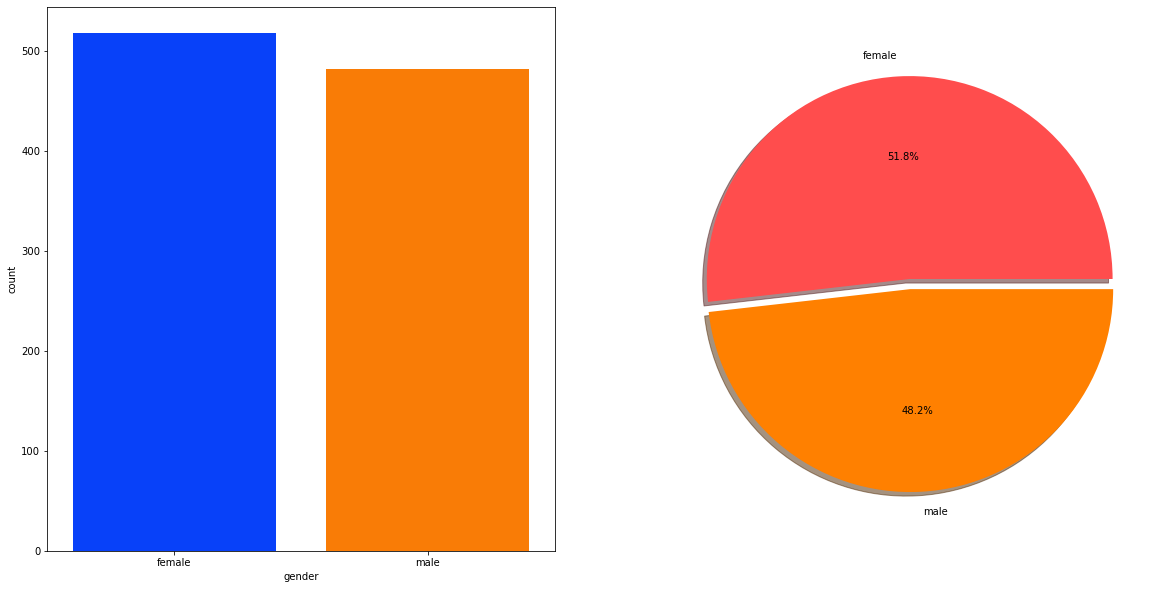

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)    
plt.pie(x=df['gender'].value_counts(),labels=['female','male'],explode=[0,0.05],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insight
- Gender has a balanced data with female 51.8% and male 48.2%

#### Bi-variate Analysis ( Is gender have any impact on student's performance? )

In [24]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


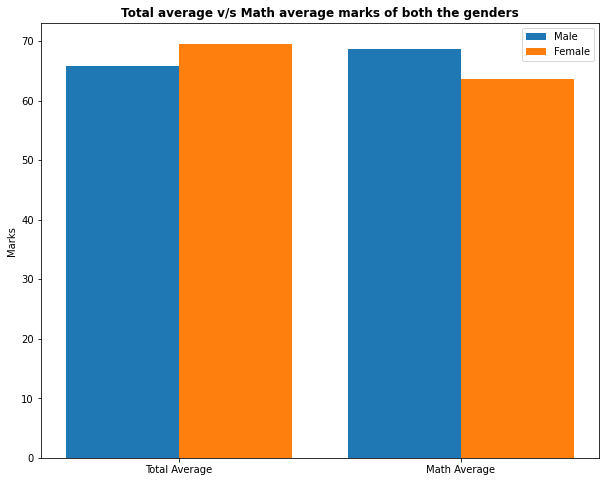

In [25]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insight
- On an average feamale have a better score than male
- Whereas male scored better in maths

In [38]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 4.4.2 Race/Ethnicity Column 

- How is group wise distribution?
- Is Race/Ethnicity has an impact on student's performance?

#### Univariate Analysis ( How is Group wise distribution? ) 

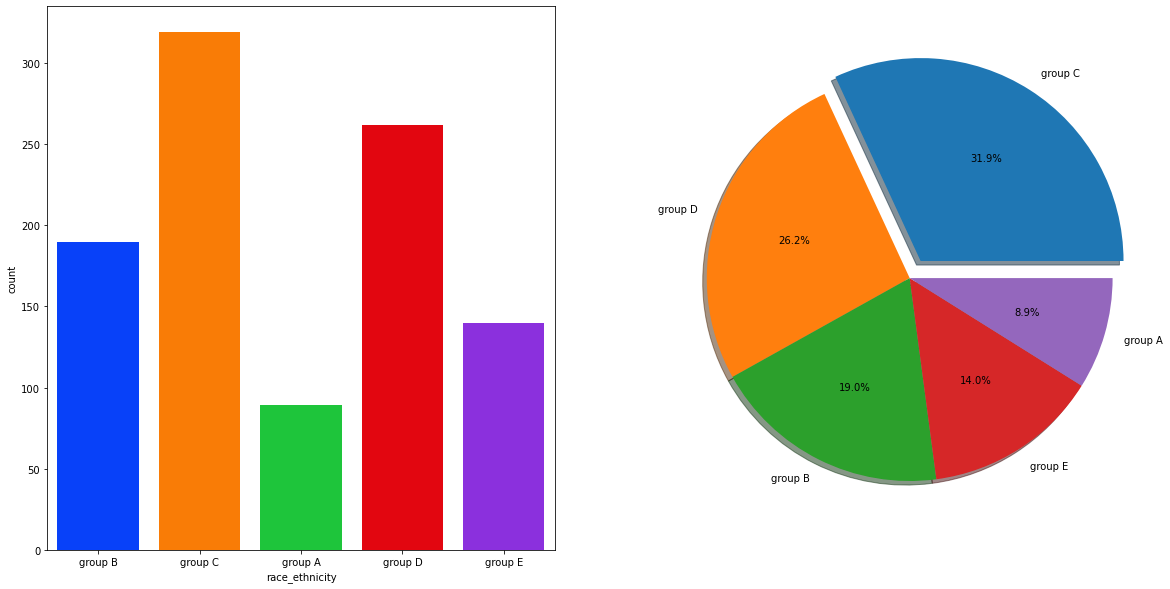

In [39]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    pass
    #ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insight
- Most of the students belong to 'group C' and 'group D'
- Lowest numbers of student belong to 'group A'

#### Bi-variate Analysis - ( Is Race/Ethnicity has an impact on student's performance? )

Text(0.5, 1.0, 'Reading Score')

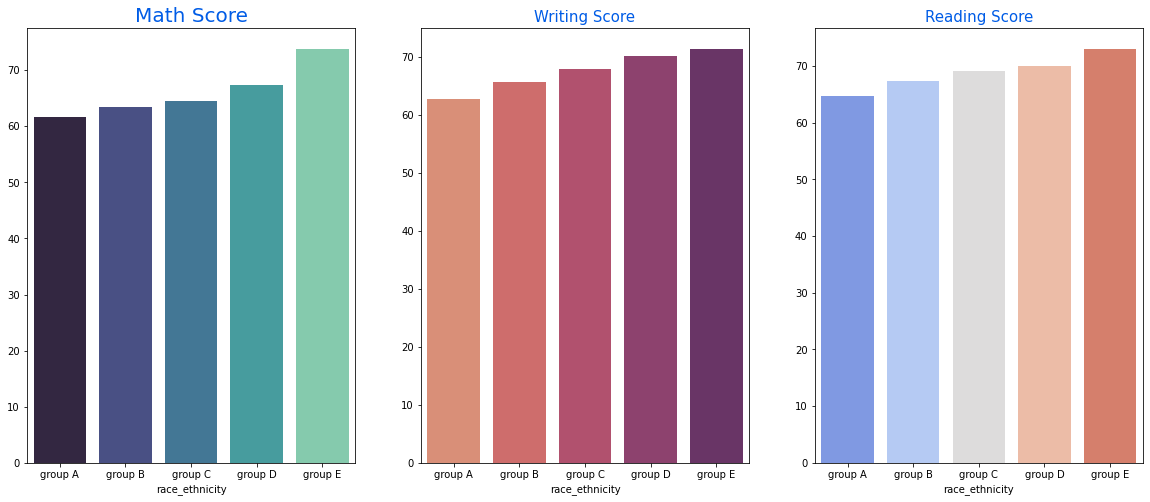

In [50]:
race_ethnicity_group=df.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_ethnicity_group['math_score'].mean().index,y=race_ethnicity_group['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

sns.barplot(x=race_ethnicity_group['writing_score'].mean().index,y=race_ethnicity_group['writing_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Writing Score', color='#005ce6',size=15)

sns.barplot(x=race_ethnicity_group['reading_score'].mean().index,y=race_ethnicity_group['reading_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Reading Score', color='#005ce6',size=15)

#### Insight
- Group E students score the highest score
- Group A students score the lowest score
- Students from lower socio-economic status have a lower avg/score in all courses subjects

In [51]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### 4.4.3 Parental level of education Column

- What is the educational background of student's parent?
- Is parent education has any impact on student performance?

#### Univariate Analysis - ( What is the educational background of student's parent? )

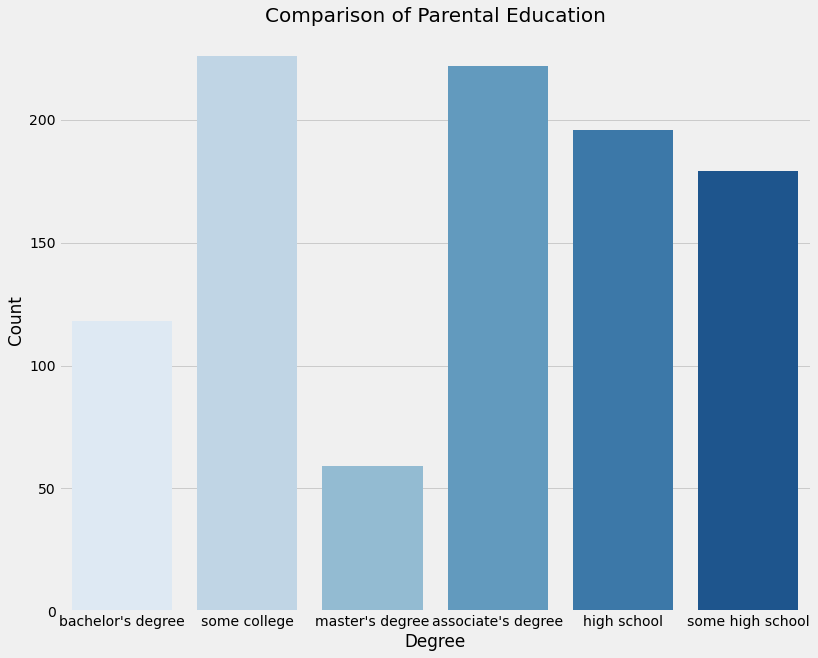

In [67]:
plt.rcParams['figure.figsize']=(12,10)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of Parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insight
- Largest number of parent degree is 'some college'
- Follow by 'associate's degree'

#### Bi-variate Analysis - ( Is parental education has an impact on student's performance? )

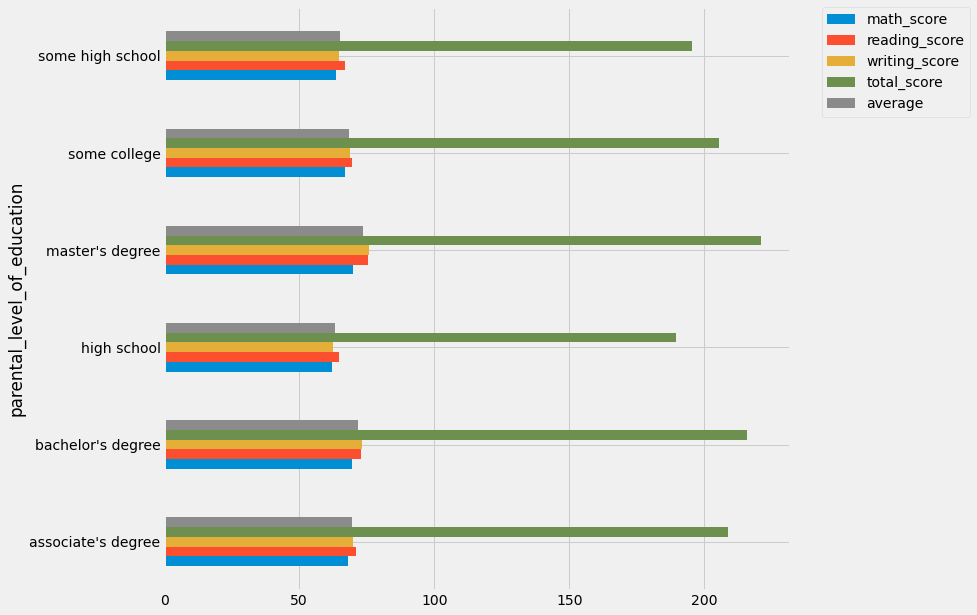

In [69]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insight
- The score of students whose parents possess master's and bachelor's degree are higher than others

### 4.4.4 Lunch

- What is the type of lunch most common amongs students?
- Is lunch has any impact on student's performance?

#### Univariate Analysis - ( What is the type of lunch most common amongs students? )

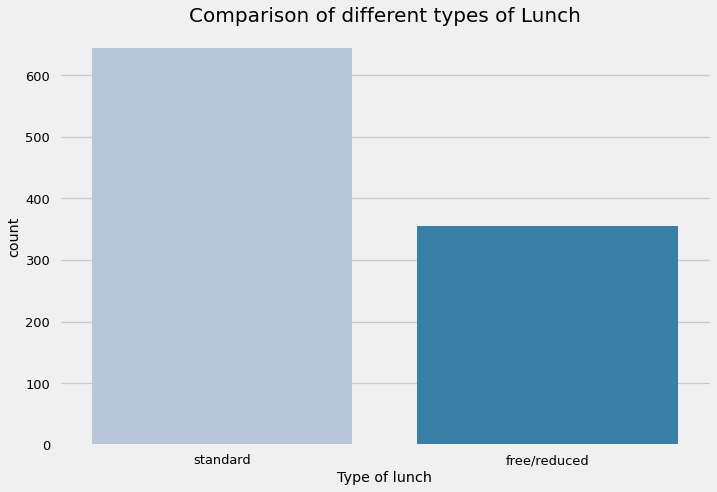

In [76]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'],palette='PuBu')
plt.title('Comparison of different types of Lunch',fontweight=30,fontsize=20)
plt.xlabel('Type of lunch')
plt.ylabel('count')
plt.show()

#### Insight
- Students being served standard was more than free lunch

#### Bi-variate Analysis - ( Is lunch has any impact on student's performance? )

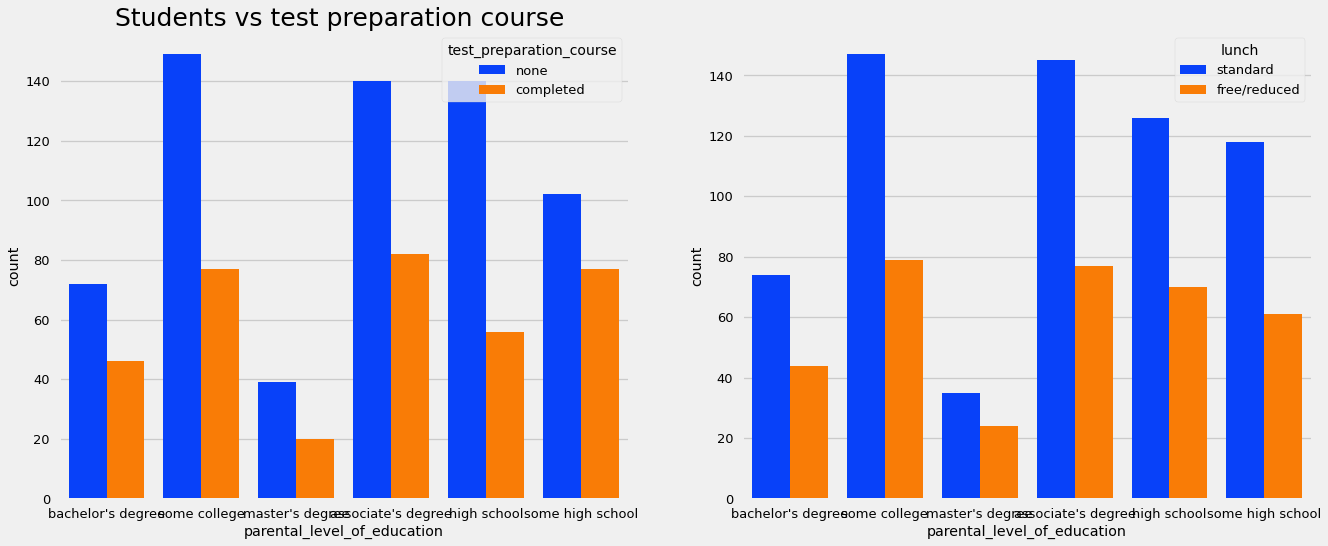

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    #ax[0].bar_label(container,color='black',size=20)
    pass
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    #ax[1].bar_label(container,color='black',size=20)
    pass

<AxesSubplot:xlabel='lunch'>

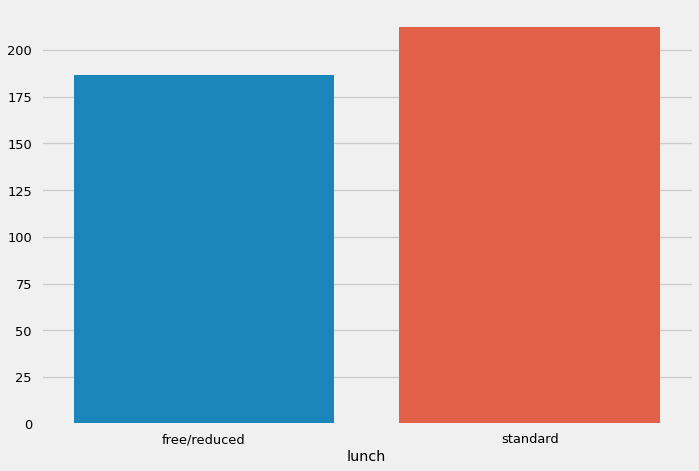

In [82]:
sns.barplot(x=df.groupby('lunch')['total_score'].mean().index,y=df.groupby('lunch')['total_score'].mean().values)

#### Insight
- Student that get standard lunch tend to perform better than student who get free lunch

### 4.4.5 Test Preparation course

- How many students take test preparation?
- Is Test preparation course has any impact on student performance?

#### Univariate Analysis - ( How many students take test preparation? )

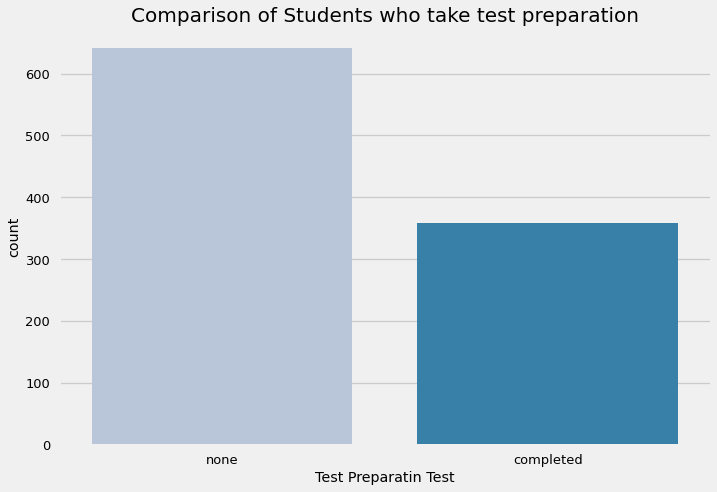

In [88]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['test_preparation_course'],palette='PuBu')
plt.title('Comparison of Students who take test preparation',fontweight=30,fontsize=20)
plt.xlabel('Test Preparatin Test')
plt.ylabel('count')
plt.show()

#### Insight
- Most of the students do not join test preparation

#### Bi-variate Analysis - ( Is test preparation has any impact on student performance? )

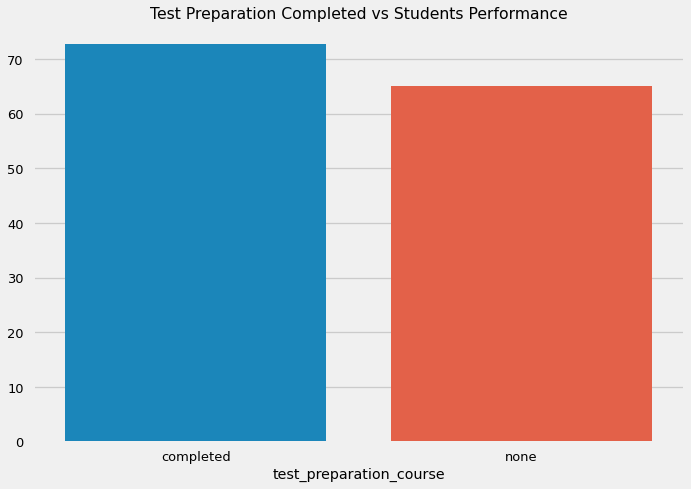

In [93]:
sns.barplot(x=df.groupby('test_preparation_course')['average'].mean().index,y=df.groupby('test_preparation_course')['average'].mean().values)
plt.title('Test Preparation Completed vs Students Performance')
plt.show()

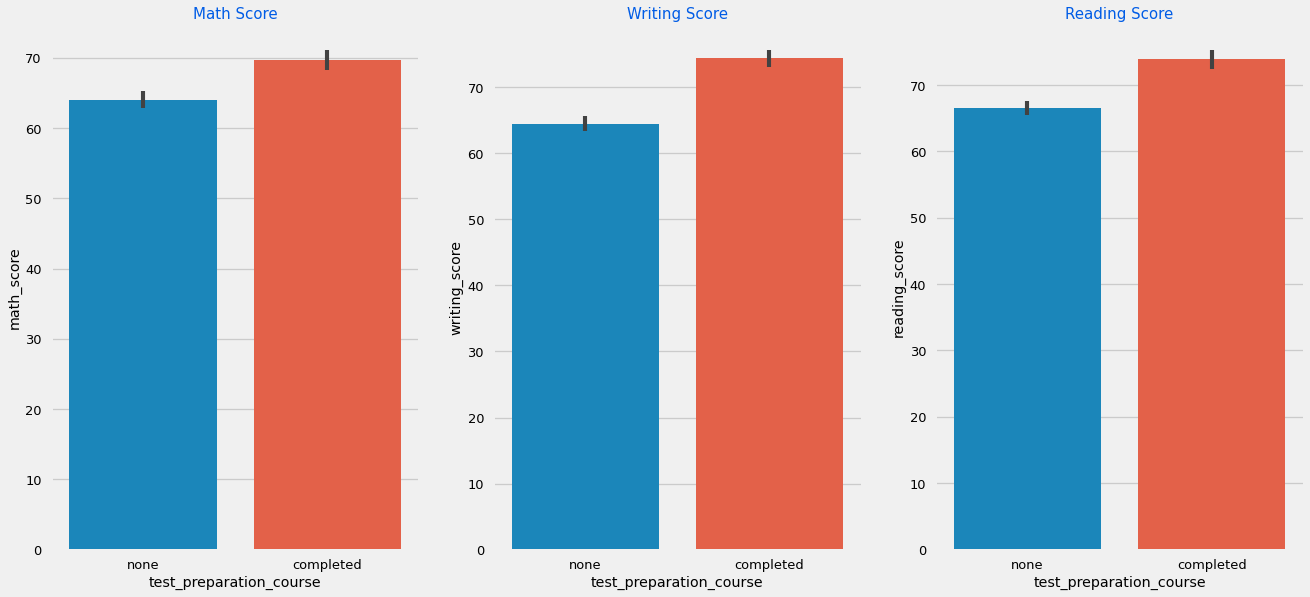

In [105]:
f,ax=plt.subplots(1,3,figsize=(20,9))
sns.barplot (x='test_preparation_course',y='math_score',data=df,ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=15)

sns.barplot (x='test_preparation_course',y='writing_score',data=df,ax=ax[1])
ax[1].set_title('Writing Score',color='#005ce6',size=15)

sns.barplot (x='test_preparation_course',y='reading_score',data=df,ax=ax[2])
ax[2].set_title('Reading Score',color='#005ce6',size=15)

plt.show()

#### Insight
- Students who completed the test preparation course have scores higher in all three categories than those not taken the course

### 4.5 Multivariate Analysis - Using pairplot

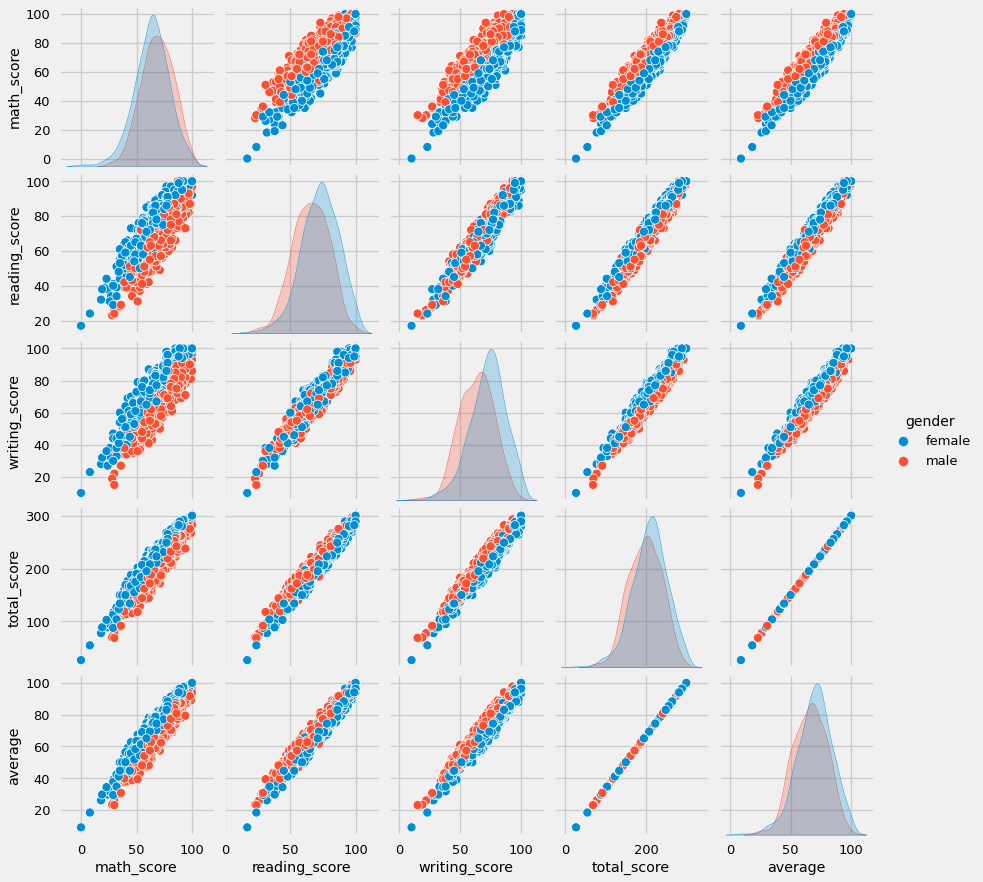

In [107]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insight
- From the above plot it is clear that all score increase linearly with each other

### 4.6. Outliers

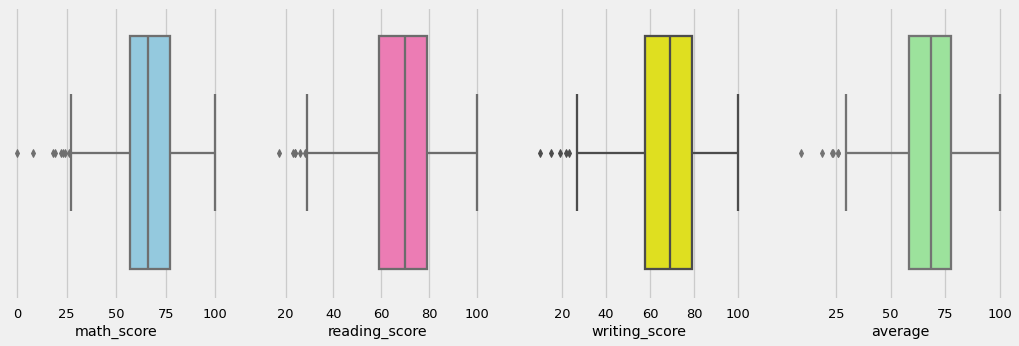

In [106]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### Insight
- There are some outliers in the dataset

### 5. Conclusion 

- Student's performance is related with lunch,race,parental level of education
- Female leads in pass % and also highest scores, whereas male score higher in maths
- Student's performance is not much related with test preparation course
- Completed test preparation course is beneficials